# **Task-1:**

In [29]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# **Image Inpainting**

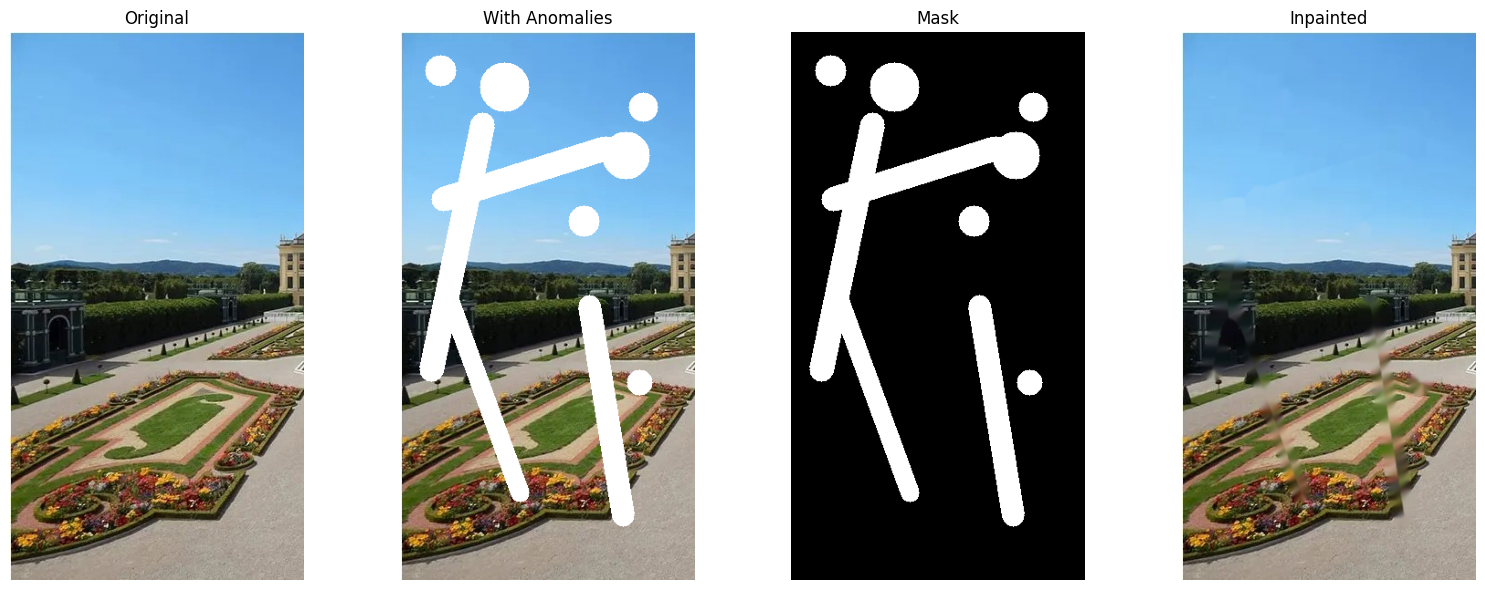

In [28]:
img = cv2.imread('/content/image1.jpg')
img_with_anomaly = img.copy()
mask = np.zeros(img.shape[:2], dtype=np.uint8)

height, width = img.shape[:2]

# Draw random anomalies (white lines or circles)
for _ in range(10):
    x1, y1 = random.randint(0, width), random.randint(0, height)
    x2, y2 = random.randint(0, width), random.randint(0, height)
    color = (255, 255, 255)
    thickness = random.randint(10, 30)

    # 50% chance to draw line or circle
    if random.random() < 0.5:
        cv2.line(img_with_anomaly, (x1, y1), (x2, y2), color, thickness)
        cv2.line(mask, (x1, y1), (x2, y2), 255, thickness)
    else:
        radius = random.randint(10, 30)
        cv2.circle(img_with_anomaly, (x1, y1), radius, color, -1)
        cv2.circle(mask, (x1, y1), radius, 255, -1)

inpainted = cv2.inpaint(img_with_anomaly, mask, 3, cv2.INPAINT_NS)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
anomaly_rgb = cv2.cvtColor(img_with_anomaly, cv2.COLOR_BGR2RGB)
inpainted_rgb = cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(anomaly_rgb)
plt.title("With Anomalies")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(mask_rgb)
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(inpainted_rgb)
plt.title("Inpainted")
plt.axis("off")

plt.tight_layout()
plt.show()


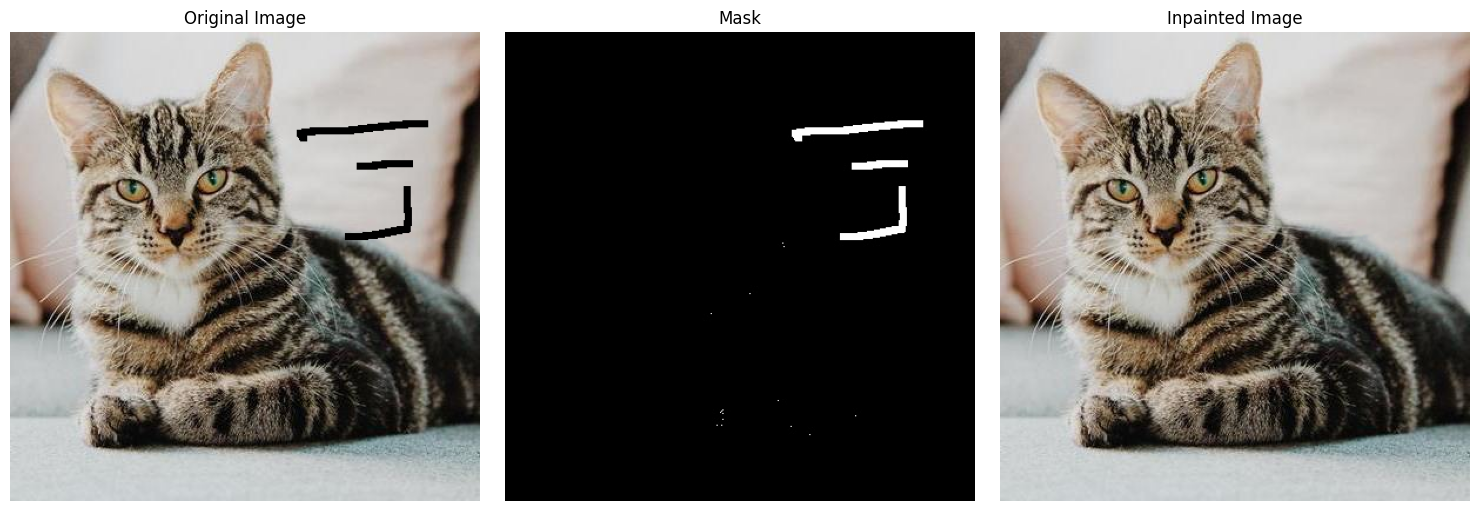

In [ ]:
damaged_img = cv2.imread(filename=r"cat_damaged.png")

# Get the shape of the image
height, width = damaged_img.shape[0], damaged_img.shape[1]

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]

# Save the mask
mask = damaged_img
cv2.imwrite('mask.jpg', mask)

# Load the original image and mask
img = cv2.imread('cat_damaged.png')
mask = cv2.imread('/content/mask.jpg', 0)

# Inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

# Save the inpainted image
cv2.imwrite('cat_inpainted.png', dst)

# Convert images to RGB for plotting (OpenCV loads in BGR)
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask_img = cv2.cvtColor(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2RGB)
inpainted_img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Plot original, mask, and inpainted image in a single row
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_img)
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(inpainted_img)
plt.title('Inpainted Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Panorama Stitching**

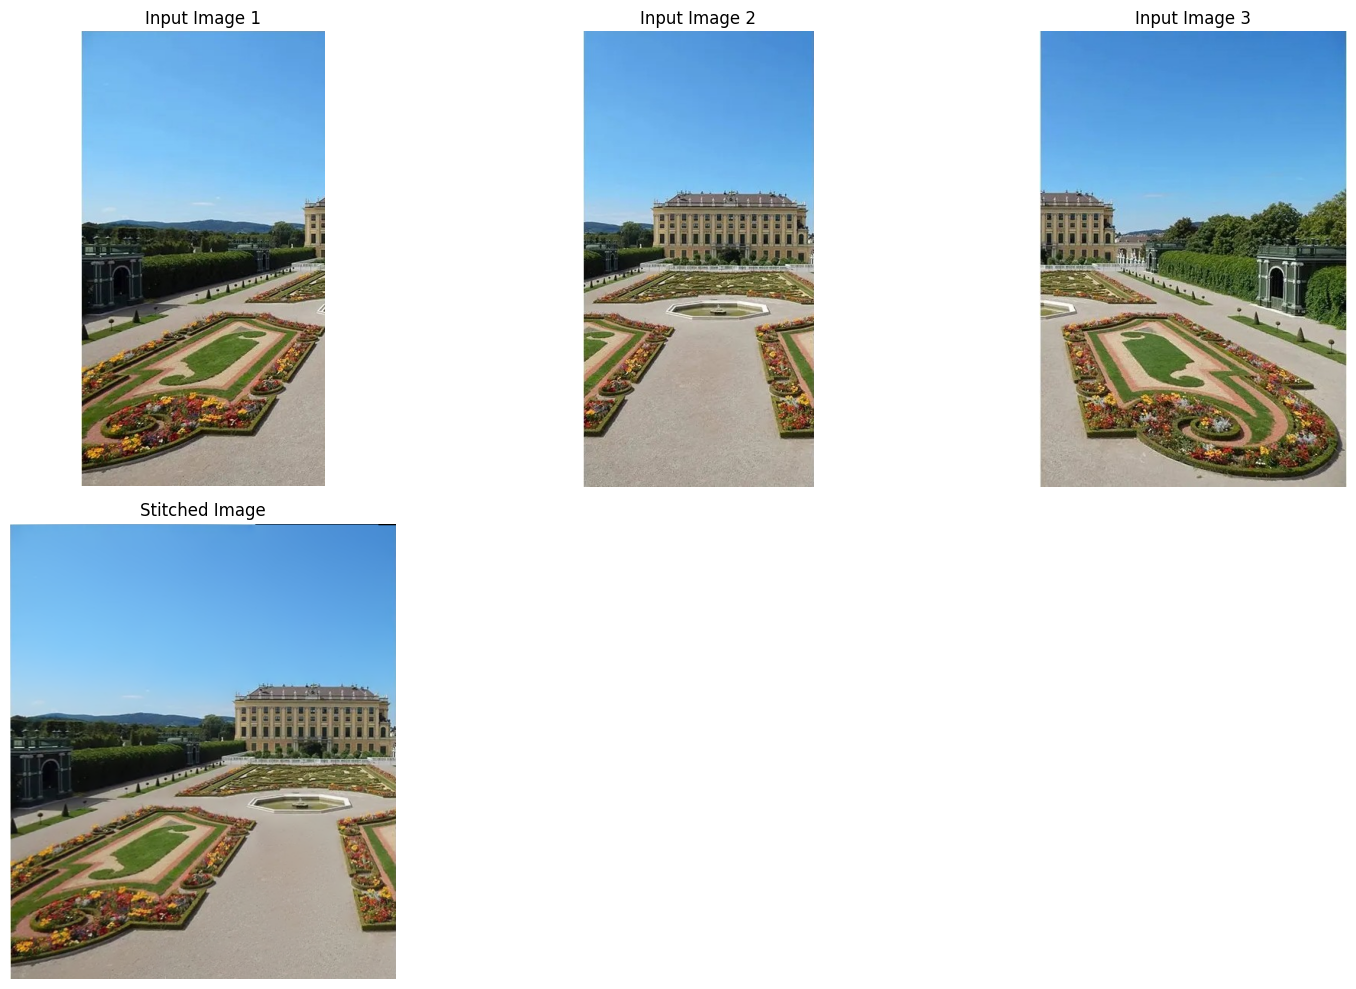

In [ ]:
def image_stitching(images):
    stitcher = cv2.Stitcher_create()
    status, stitched_image = stitcher.stitch(images)
    if status == cv2.Stitcher_OK:
        return stitched_image
    else:
        print("Image stitching failed!")
        return None

# Load input images
Unstitched_input_img = ["/content/image1.jpg", "/content/image2.jpg", "/content/image3.jpg"]
images = [cv2.imread(image) for image in Unstitched_input_img]

# Perform stitching
stiched_img = image_stitching(images)

# Convert images to RGB for plotting (OpenCV loads in BGR)
input_images = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB) for img in Unstitched_input_img]
if stiched_img is not None:
    stiched_img_rgb = cv2.cvtColor(stiched_img, cv2.COLOR_BGR2RGB)

# Plot input images in the first row
plt.figure(figsize=(15, 10))
for i, img in enumerate(input_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title('Input Image {}'.format(i + 1))
    plt.axis('off')

# Plot stitched image in the second row
if stiched_img is not None:
    plt.subplot(2, 3, 4)
    plt.imshow(stiched_img_rgb)
    plt.title('Stitched Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# **Image Stitching**

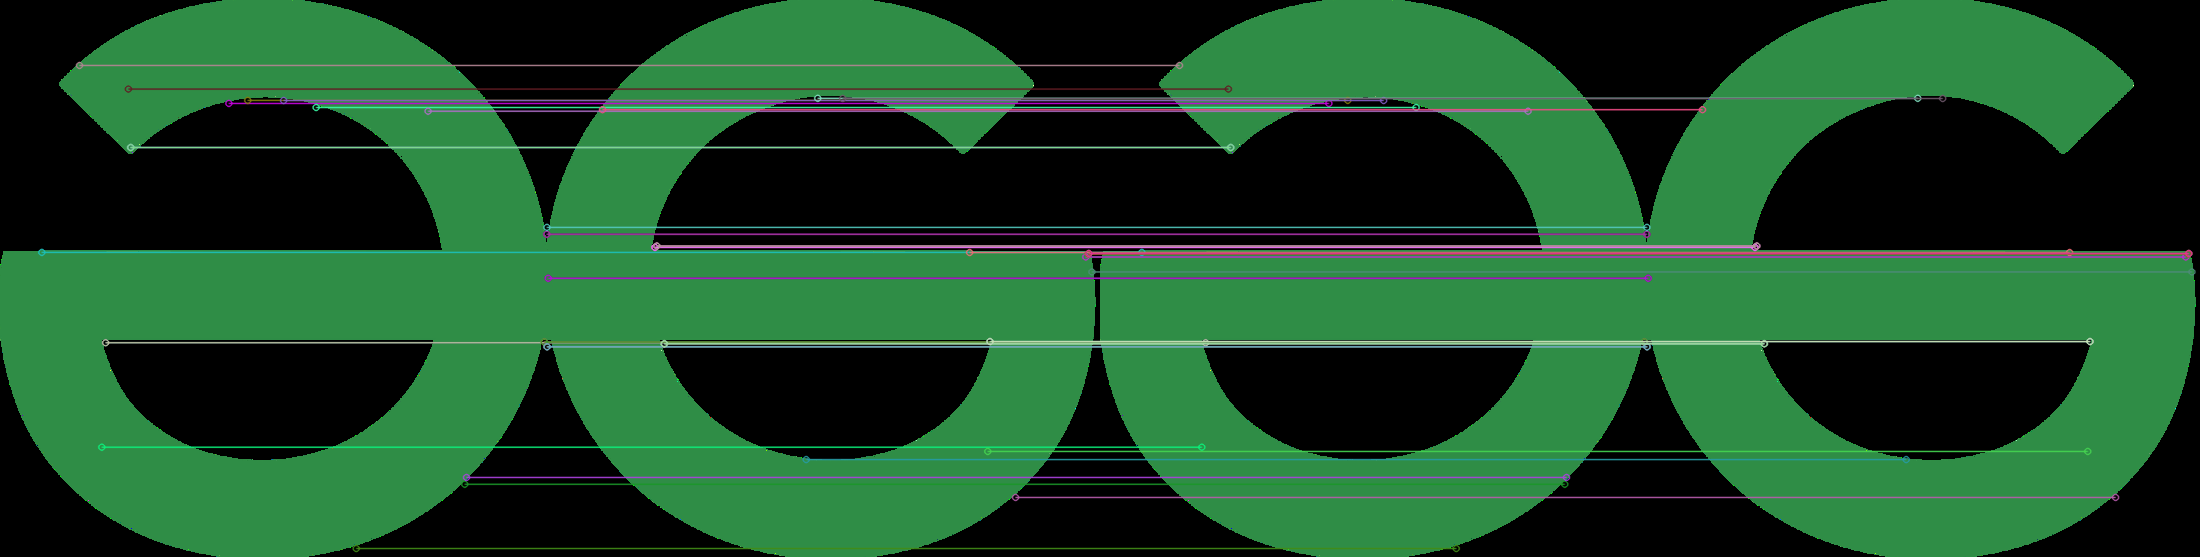

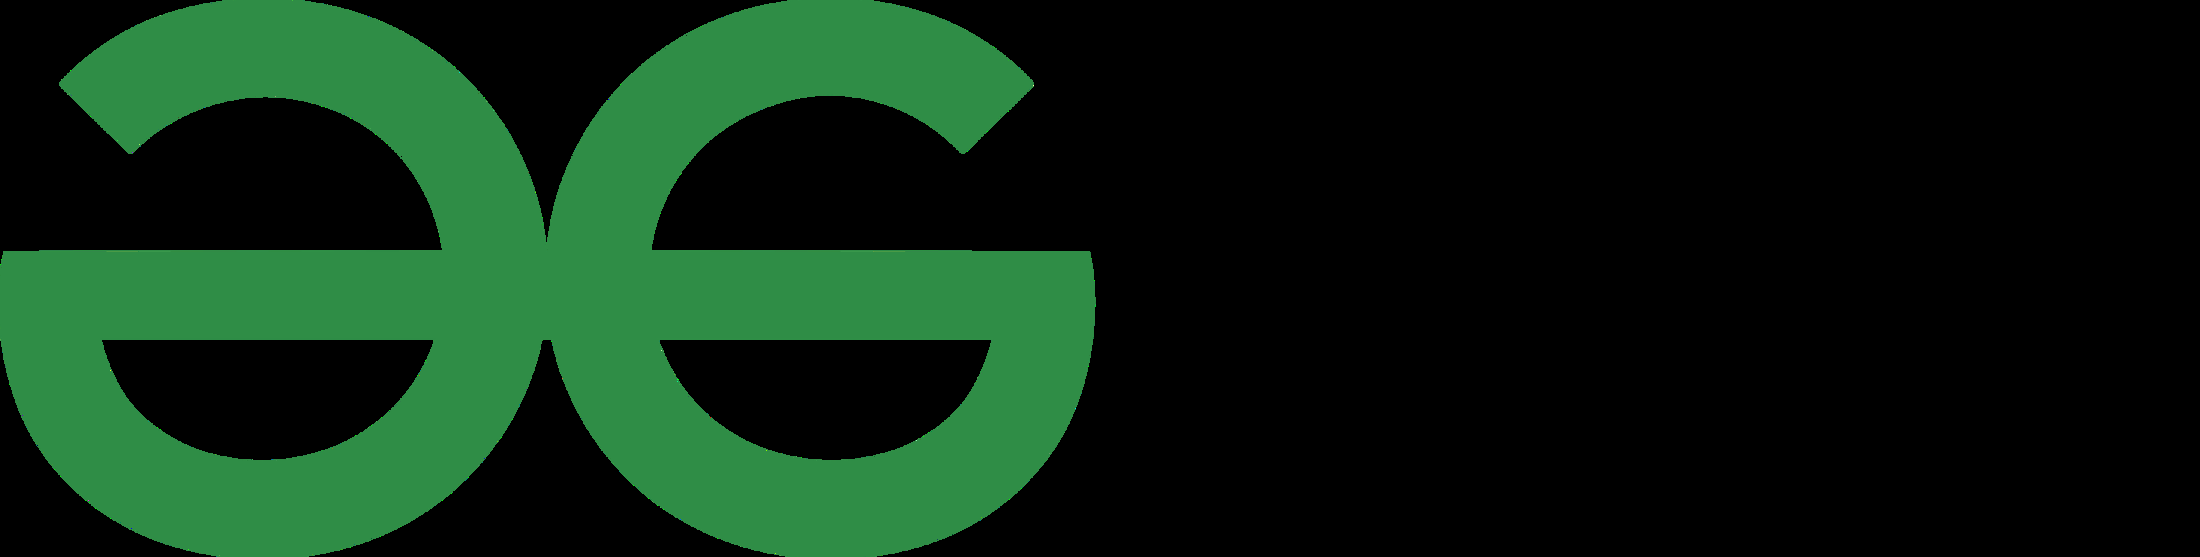

In [25]:
img1 = cv2.imread('/content/gfg1.png')
img2 = cv2.imread('/content/gfg2.png')
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img_matches)
# Extract location of good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
# Get the dimensions of the images
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# Get the canvas dimesions
pts = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, H)
img2_warped = cv2.warpPerspective(img2, H, (w1 + w2, h1))

# Place the first image on the canvas
img2_warped[0:h1, 0:w1] = img1
# Simple blending technique
result = img2_warped
cv2_imshow(result)

# **Structure from Motion**

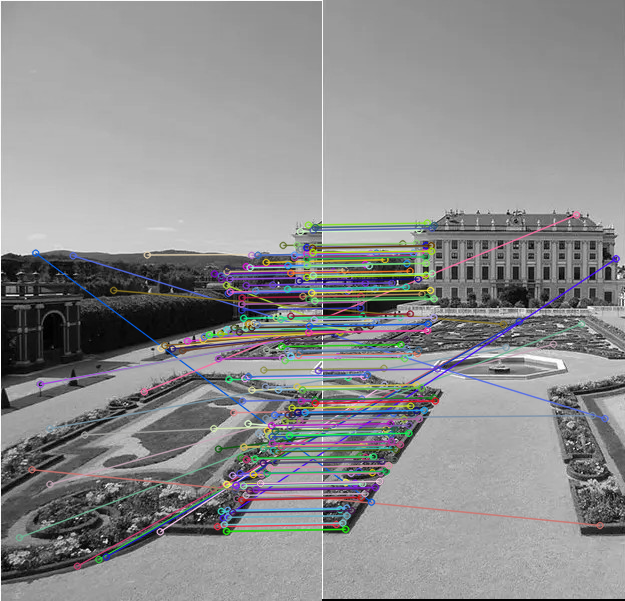

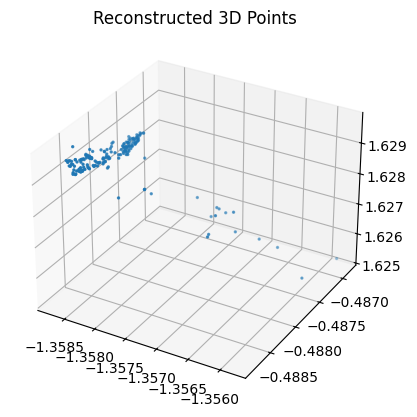

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    return img1, img2

def detect_and_match_features(img1, img2):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match descriptors using FLANN
    index_params = dict(algorithm=1, trees=5)  # KDTree
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])
    return pts1, pts2, kp1, kp2, good_matches

def estimate_camera_pose(pts1, pts2, K):
    E, mask = cv2.findEssentialMat(pts1, pts2, K)
    _, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)
    return R, t

def triangulate_points(R, t, pts1, pts2, K):
    proj1 = np.dot(K, np.hstack((np.eye(3), np.zeros((3, 1)))))
    proj2 = np.dot(K, np.hstack((R, t)))

    pts1_h = cv2.undistortPoints(np.expand_dims(pts1, axis=1), K, None)
    pts2_h = cv2.undistortPoints(np.expand_dims(pts2, axis=1), K, None)

    points_4d = cv2.triangulatePoints(proj1, proj2, pts1_h, pts2_h)
    points_3d = points_4d / points_4d[3]  # Convert from homogeneous
    return points_3d[:3].T

def plot_3d_points(points_3d):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], s=2)
    ax.set_title("Reconstructed 3D Points")
    plt.show()

def draw_matches(img1, img2, kp1, kp2, good_matches):
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2_imshow( img_matches)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Define your camera intrinsics here (either real or approximate)
    K = np.array([[718.856, 0, 607.1928],
                  [0, 718.856, 185.2157],
                  [0, 0, 1]])

    img1, img2 = load_images('image1.jpg', 'image2.jpg')
    pts1, pts2, kp1, kp2, matches = detect_and_match_features(img1, img2)

    draw_matches(img1, img2, kp1, kp2, matches)

    R, t = estimate_camera_pose(pts1, pts2, K)
    points_3d = triangulate_points(R, t, pts1, pts2, K)

    plot_3d_points(points_3d)

# **Task-2: Image Restoration using Autoencoder Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load & Preprocess Data
def load_preprocess_data():
    (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

    # Normalize to [0,1]
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Reshape for model (add channel dimension for grayscale)
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    return x_train, x_test

In [ ]:
# Step 2: Simulate Degradation (Slightly Increased Noise)
def add_degradation(img):
    noise_factor = 0.3  # Increased from 0.2
    noisy = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    noisy = np.clip(noisy, 0., 1.)
    blurred = cv2.GaussianBlur(noisy, (3, 3), 0)
    return blurred

In [ ]:
# Step 3: Build Autoencoder Model (Slightly Deeper)
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)  # Add batch normalization
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    encoded = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
    return autoencoder

In [ ]:
# Step 4: Train the Model
def train_autoencoder(autoencoder, x_train, x_test):
    x_train_degraded = np.array([add_degradation(img) for img in x_train])
    x_test_degraded = np.array([add_degradation(img) for img in x_test])

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    history = autoencoder.fit(
        x_train_degraded, x_train,
        epochs=100,
        batch_size=128,
        shuffle=True,
        validation_data=(x_test_degraded, x_test),
        callbacks=[early_stopping],
        verbose=1
    )

    return x_train_degraded, x_test_degraded, history

In [ ]:
# Step 5: Image Restoration & Evaluation (Add History Plot)
def evaluate_restoration(autoencoder, x_test, x_test_degraded, history):
    restored = autoencoder.predict(x_test_degraded)

    psnr_values = [psnr(x_test[i].squeeze(), restored[i].squeeze()) for i in range(len(x_test))]
    avg_psnr = np.mean(psnr_values)
    print(f'Average PSNR: {avg_psnr:.2f} dB')

    # Visualize training history
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Visualize results
    n = 5
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_degraded[i].squeeze(), cmap='gray')
        plt.title('Degraded')
        plt.axis('off')

        plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(restored[i].squeeze(), cmap='gray')
        plt.title('Restored')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.savefig('restoration_results.png')
    plt.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.2046 - val_loss: 0.0611
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0180 - val_loss: 0.0148
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0143 - val_loss: 0.0130
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss:

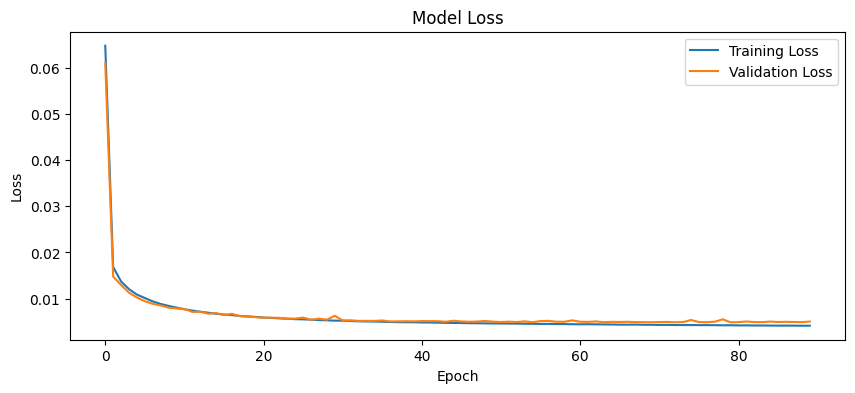

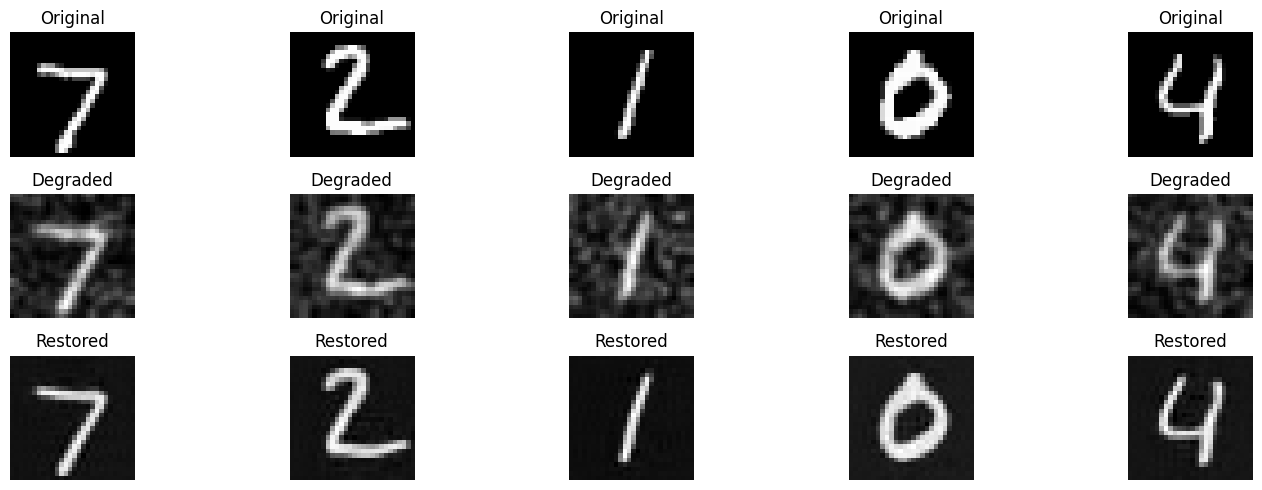

In [ ]:
if __name__ == '__main__':
    x_train, x_test = load_preprocess_data()
    autoencoder = build_autoencoder()
    x_train_degraded, x_test_degraded, history = train_autoencoder(autoencoder, x_train, x_test)
    evaluate_restoration(autoencoder, x_test, x_test_degraded, history)